In [1]:
import torch
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np

### 读取一张图片

In [2]:
torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

device(type='cuda', index=0)

In [3]:
num_str = '{:0>6d}'.format(1)
path = 'data/mchar_train/'+num_str+'.png'
path

'data/mchar_train/000001.png'

#### 获取路径

In [4]:
def get_train_path(num: 'int >= 0 && int <= 29999'):
    if num > 29999 or num < 0:
        print('index out of bound!')
        return 'data/mchar_train/'+'000000'+'.png'

    num_str = '{:0>6d}'.format(num) # 格式化字符串，左边补0至6位
    return 'data/mchar_train/'+num_str+'.png'

def get_test_path(num: 'int >= 0 && int <= 9999'):
    if num > 9999 or num < 0:
        print('index out of bound!')
        return 'data/mchar_test_a/'+'000000'+'.png'

    num_str = '{:0>6d}'.format(num) # 格式化字符串，左边补0至6位
    return 'data/mchar_test_a/'+num_str+'.png'

def get_val_path(num: 'int >= 0 && int <= 39999'):
    if num > 39999 or num < 0:
        print('index out of bound!')
        return 'data/mchar_val/'+'000000'+'.png'

    num_str = '{:0>6d}'.format(num) # 格式化字符串，左边补0至6位
    return 'data/mchar_val/'+num_str+'.png'

In [5]:
get_train_path(-1)

index out of bound!


'data/mchar_train/000000.png'

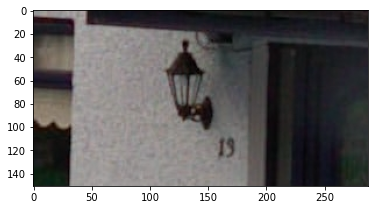

In [6]:
path = get_val_path(12)
img = cv2.imread(path)
plt.imshow(img)

In [13]:
type(img)

numpy.ndarray

In [14]:
# 宽（高）、长、通道数
img.shape

(151, 288, 3)

In [15]:
img[0,1]

array([157, 158, 156], dtype=uint8)

#### 读取json文件

In [7]:
train_json = json.load(open('data\mchar_train.json'))
val_json = json.load(open('data\mchar_val.json'))
list(val_json.values())[12]

{'height': [23, 23],
 'label': [1, 3],
 'left': [157, 164],
 'top': [106, 106],
 'width': [9, 12]}

#### 处理标注数据

In [16]:
# 训练集，验证集的json位置提取，默认0为训练集
def parse_json(num: int, mode=0):
    num_str = '{:0>6d}'.format(num) + '.png'
    if mode==0:
        d = train_json[num_str]
    elif mode==1:
        d = val_json[num_str]
    else:
        print('Mode error!')
        return train_json[num_str]

    arr = np.array([d['top'], d['height'], d['left'], d['width'], d['label']])
    arr = arr.astype(int)
    return arr

arr = parse_json(1)
arr

array([[29, 25],
       [32, 32],
       [77, 98],
       [23, 26],
       [ 2,  3]])

In [17]:
arr.shape

(5, 2)

In [19]:
arr[0,1]

25

#### 位置提取与展示

In [9]:
# 训练集，验证集的数字位置提取，默认为训练集
def show_loc(num: int, mode=0):
    if mode==0:
        path = get_train_path(num)
        arr = parse_json(num)
    elif mode==1:
        path = get_val_path(num)
        arr = parse_json(num, 1)
    else:
        print('Mode error!')
        return 'error!'
    
    img = cv2.imread(path)
    shape = arr.shape[1]
    plt.figure(figsize=(10, 10))
    plt.subplot(1, shape+1, 1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

    for idx in range(shape):
        plt.subplot(1, shape+1, idx+2)
        plt.imshow(img[arr[0, idx]:arr[0, idx]+arr[1, idx], arr[2, idx]:arr[2, idx]+arr[3, idx]])
        plt.title(arr[4, idx])
        plt.xticks([])
        plt.yticks([])

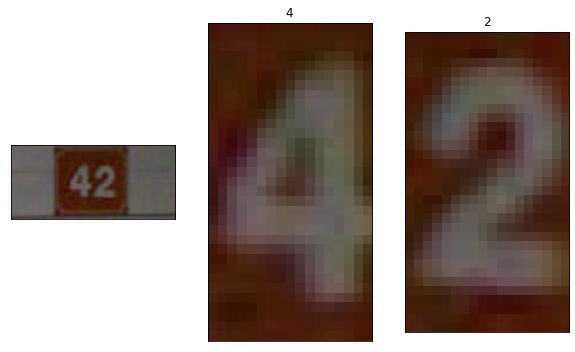

In [10]:
#训练集模式
show_loc(12)

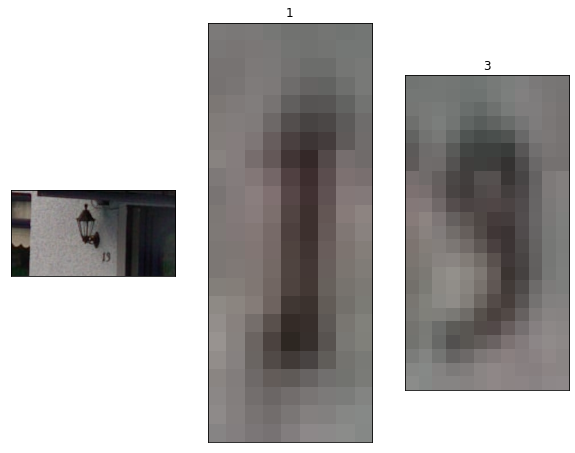

In [11]:
# 验证集模式，这个看起来更像是19啊
show_loc(12, 1)

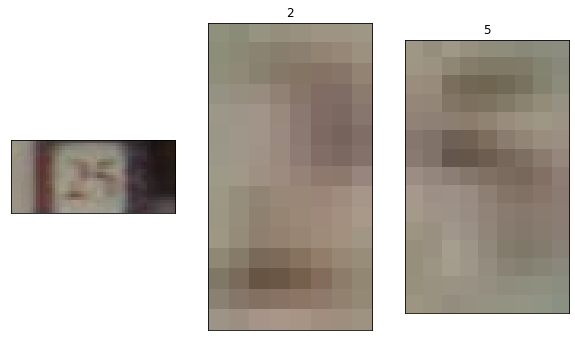

In [12]:
# 这也太模糊了
show_loc(2)